# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [52]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [53]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
# every series is a method
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [54]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [55]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [56]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]
print(s)

a   -1.242370
b    0.393459
c   -0.476700
d    0.457279
e    0.723948
dtype: float64
a         NaN
b    0.786917
c   -0.953401
d    0.914557
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [57]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2021,11,22,12,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 22 2021'
print (date)
days = pd.date_range(date, periods=7, freq='D')
print (days)
# or alternatively
date = '22/11/2021 12:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2021-11-22
2021-11-22 12:45:10.000015
Nov 22 2021
DatetimeIndex(['2021-11-22', '2021-11-23', '2021-11-24', '2021-11-25',
               '2021-11-26', '2021-11-27', '2021-11-28'],
              dtype='datetime64[ns]', freq='D')
22/11/2021 12:45:00
DatetimeIndex(['2021-11-22 12:45:00', '2021-11-23 12:45:00',
               '2021-11-24 12:45:00', '2021-11-25 12:45:00',
               '2021-11-26 12:45:00', '2021-11-27 12:45:00',
               '2021-11-28 12:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2021-11-22 12:45:00', '2021-11-22 12:45:01',
               '2021-11-22 12:45:02', '2021-11-22 12:45:03',
               '2021-11-22 12:45:04', '2021-11-22 12:45:05',
               '2021-11-22 12:45:06', '2021-11-22 12:45:07',
               '2021-11-22 12:45:08', '2021-11-22 12:45:09',
               ...
               '2021-11-22 13:44:50', '2021-11-22 13:44:51',
               '2021-11-22 13:44:52', '2021-11-22 13:44:53',
               '2021-11-22 13:44:54',

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

In [58]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)
print(tstamp.day_name)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<bound method Timestamp.day_name of Timestamp('2020-11-09 00:00:00')>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1289520000000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [59]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2021-11-22':'2021-11-23'], '\n') # Note - includes end time


2021-11-22 12:45:00     9.701345
2021-11-23 12:45:00     9.808371
2021-11-24 12:45:00    10.175330
2021-11-25 12:45:00     7.904694
Freq: D, dtype: float64 

2021-11-22 12:45:00    9.701345
2021-11-23 12:45:00    9.808371
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [60]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [61]:
entries=10
dates=pd.date_range('11/22/2021 12:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2021-11-22 12:45:00,-0.726874,0.817315,-0.478015,0.466877
2021-11-22 13:45:00,1.641790,0.399169,1.054088,0.828877
2021-11-22 14:45:00,-1.310471,1.132953,-0.172538,-1.372764
2021-11-22 15:45:00,2.110360,-0.910910,0.129851,0.219313
2021-11-22 16:45:00,-1.311974,-0.162781,-0.078605,0.270559
2021-11-22 17:45:00,1.154420,0.624324,-0.813786,1.329151
2021-11-22 18:45:00,-0.299010,0.168344,1.923140,0.641250
2021-11-22 19:45:00,-0.818195,-1.936570,-0.820844,-1.323579
2021-11-22 20:45:00,1.033000,0.766512,-1.327685,-0.704830
2021-11-22 21:45:00,0.063740,-0.243284,-0.004948,0.489068


or by means of a dictionary:


In [62]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

# check what happens if D and E had different lenghts 
# ValueError: arrays must all be same length

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [63]:
df.head(2)

,A,B,C,D
2021-11-22 12:45:00,-0.726874,0.817315,-0.478015,0.466877
2021-11-22 13:45:00,1.641790,0.399169,1.054088,0.828877


In [64]:
df.tail(4)

,A,B,C,D
2021-11-22 18:45:00,-0.299010,0.168344,1.923140,0.641250
2021-11-22 19:45:00,-0.818195,-1.936570,-0.820844,-1.323579
2021-11-22 20:45:00,1.033000,0.766512,-1.327685,-0.704830
2021-11-22 21:45:00,0.063740,-0.243284,-0.004948,0.489068


In [65]:
df.index

DatetimeIndex(['2021-11-22 12:45:00', '2021-11-22 13:45:00',
               '2021-11-22 14:45:00', '2021-11-22 15:45:00',
               '2021-11-22 16:45:00', '2021-11-22 17:45:00',
               '2021-11-22 18:45:00', '2021-11-22 19:45:00',
               '2021-11-22 20:45:00', '2021-11-22 21:45:00'],
              dtype='datetime64[ns]', freq='H')

In [66]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [67]:
df.values

array([[-0.7268743 ,  0.81731537, -0.47801517,  0.46687676],
       [ 1.64178962,  0.39916893,  1.05408831,  0.82887742],
       [-1.31047059,  1.13295328, -0.17253814, -1.37276374],
       [ 2.11036003, -0.91091019,  0.12985102,  0.21931334],
       [-1.31197377, -0.16278135, -0.07860499,  0.27055928],
       [ 1.15441962,  0.624324  , -0.8137856 ,  1.32915085],
       [-0.29901027,  0.16834418,  1.9231398 ,  0.64125004],
       [-0.81819474, -1.93656974, -0.82084402, -1.32357883],
       [ 1.03300016,  0.76651211, -1.32768491, -0.70483049],
       [ 0.06373963, -0.24328372, -0.00494772,  0.48906775]])

In [68]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.153679,0.065507,-0.058934,0.084392
std,1.249114,0.927327,0.951896,0.913190
min,-1.311974,-1.936570,-1.327685,-1.372764
25%,-0.795365,-0.223158,-0.729843,-0.473795
50%,-0.117635,0.283757,-0.125572,0.368718
75%,1.124065,0.730965,0.096151,0.603204
max,2.110360,1.132953,1.923140,1.329151


In [69]:
df.T

,2021-11-22 12:45:00,2021-11-22 13:45:00,2021-11-22 14:45:00,2021-11-22 15:45:00,2021-11-22 16:45:00,2021-11-22 17:45:00,2021-11-22 18:45:00,2021-11-22 19:45:00,2021-11-22 20:45:00,2021-11-22 21:45:00
A,-0.726874,1.641790,-1.310471,2.110360,-1.311974,1.154420,-0.299010,-0.818195,1.033000,0.063740
B,0.817315,0.399169,1.132953,-0.910910,-0.162781,0.624324,0.168344,-1.936570,0.766512,-0.243284
C,-0.478015,1.054088,-0.172538,0.129851,-0.078605,-0.813786,1.923140,-0.820844,-1.327685,-0.004948
D,0.466877,0.828877,-1.372764,0.219313,0.270559,1.329151,0.641250,-1.323579,-0.704830,0.489068


In [70]:
df.sort_index(axis=0,ascending=True)

,A,B,C,D
2021-11-22 12:45:00,-0.726874,0.817315,-0.478015,0.466877
2021-11-22 13:45:00,1.641790,0.399169,1.054088,0.828877
2021-11-22 14:45:00,-1.310471,1.132953,-0.172538,-1.372764
2021-11-22 15:45:00,2.110360,-0.910910,0.129851,0.219313
2021-11-22 16:45:00,-1.311974,-0.162781,-0.078605,0.270559
2021-11-22 17:45:00,1.154420,0.624324,-0.813786,1.329151
2021-11-22 18:45:00,-0.299010,0.168344,1.923140,0.641250
2021-11-22 19:45:00,-0.818195,-1.936570,-0.820844,-1.323579
2021-11-22 20:45:00,1.033000,0.766512,-1.327685,-0.704830
2021-11-22 21:45:00,0.063740,-0.243284,-0.004948,0.489068


In [71]:
df.sort_values(by="C")

,A,B,C,D
2021-11-22 20:45:00,1.033000,0.766512,-1.327685,-0.704830
2021-11-22 19:45:00,-0.818195,-1.936570,-0.820844,-1.323579
2021-11-22 17:45:00,1.154420,0.624324,-0.813786,1.329151
2021-11-22 12:45:00,-0.726874,0.817315,-0.478015,0.466877
2021-11-22 14:45:00,-1.310471,1.132953,-0.172538,-1.372764
2021-11-22 16:45:00,-1.311974,-0.162781,-0.078605,0.270559
2021-11-22 21:45:00,0.063740,-0.243284,-0.004948,0.489068
2021-11-22 15:45:00,2.110360,-0.910910,0.129851,0.219313
2021-11-22 13:45:00,1.641790,0.399169,1.054088,0.828877
2021-11-22 18:45:00,-0.299010,0.168344,1.923140,0.641250


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [72]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
## like A is Awensome
print (df.A)

2021-11-22 12:45:00   -0.726874
2021-11-22 13:45:00    1.641790
2021-11-22 14:45:00   -1.310471
2021-11-22 15:45:00    2.110360
2021-11-22 16:45:00   -1.311974
2021-11-22 17:45:00    1.154420
2021-11-22 18:45:00   -0.299010
2021-11-22 19:45:00   -0.818195
2021-11-22 20:45:00    1.033000
2021-11-22 21:45:00    0.063740
Freq: H, Name: A, dtype: float64 

2021-11-22 12:45:00   -0.726874
2021-11-22 13:45:00    1.641790
2021-11-22 14:45:00   -1.310471
2021-11-22 15:45:00    2.110360
2021-11-22 16:45:00   -1.311974
2021-11-22 17:45:00    1.154420
2021-11-22 18:45:00   -0.299010
2021-11-22 19:45:00   -0.818195
2021-11-22 20:45:00    1.033000
2021-11-22 21:45:00    0.063740
Freq: H, Name: A, dtype: float64


In [73]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2021-11-22 12:45:00":"2021-11-22 14:45:00"])

                            A         B         C         D
2021-11-22 12:45:00 -0.726874  0.817315 -0.478015  0.466877
2021-11-22 13:45:00  1.641790  0.399169  1.054088  0.828877
2021-11-22 14:45:00 -1.310471  1.132953 -0.172538 -1.372764
                            A         B         C         D
2021-11-22 12:45:00 -0.726874  0.817315 -0.478015  0.466877
2021-11-22 13:45:00  1.641790  0.399169  1.054088  0.828877
2021-11-22 14:45:00 -1.310471  1.132953 -0.172538 -1.372764


### Selection by label

In [74]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A   -0.726874
B    0.817315
C   -0.478015
D    0.466877
Name: 2021-11-22 12:45:00, dtype: float64

In [75]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]
#a=df.loc[:,['A','B']]

,A,B
2021-11-22 12:45:00,-0.726874,0.817315
2021-11-22 13:45:00,1.641790,0.399169
2021-11-22 14:45:00,-1.310471,1.132953
2021-11-22 15:45:00,2.110360,-0.910910
2021-11-22 16:45:00,-1.311974,-0.162781
2021-11-22 17:45:00,1.154420,0.624324
2021-11-22 18:45:00,-0.299010,0.168344
2021-11-22 19:45:00,-0.818195,-1.936570
2021-11-22 20:45:00,1.033000,0.766512
2021-11-22 21:45:00,0.063740,-0.243284


In [76]:
# showing label slicing, both endpoints are included:
df.loc['2021-11-22 16:45:00':'2021-11-22 18:45:00',['A','B']]

,A,B
2021-11-22 16:45:00,-1.311974,-0.162781
2021-11-22 17:45:00,1.154420,0.624324
2021-11-22 18:45:00,-0.299010,0.168344


In [77]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

1.6417896154735427
1.6417896154735427


### Selecting by position

In [78]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A    2.110360
B   -0.910910
C    0.129851
D    0.219313
Name: 2021-11-22 15:45:00, dtype: float64 

                            A         B
2021-11-22 15:45:00  2.110360 -0.910910
2021-11-22 16:45:00 -1.311974 -0.162781


In [79]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2021-11-22 13:45:00,1.641790,1.054088
2021-11-22 14:45:00,-1.310471,-0.172538
2021-11-22 16:45:00,-1.311974,-0.078605


In [80]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2021-11-22 13:45:00  1.641790  0.399169  1.054088  0.828877
2021-11-22 14:45:00 -1.310471  1.132953 -0.172538 -1.372764 

                            B         C
2021-11-22 12:45:00  0.817315 -0.478015
2021-11-22 13:45:00  0.399169  1.054088
2021-11-22 14:45:00  1.132953 -0.172538
2021-11-22 15:45:00 -0.910910  0.129851
2021-11-22 16:45:00 -0.162781 -0.078605
2021-11-22 17:45:00  0.624324 -0.813786
2021-11-22 18:45:00  0.168344  1.923140
2021-11-22 19:45:00 -1.936570 -0.820844
2021-11-22 20:45:00  0.766512 -1.327685
2021-11-22 21:45:00 -0.243284 -0.004948


In [81]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


0.3991689336064658

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [82]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2021-11-22 12:45:00,-0.726874,0.817315,-0.478015,0.466877
2021-11-22 13:45:00,1.641790,0.399169,1.054088,0.828877
2021-11-22 14:45:00,-1.310471,1.132953,-0.172538,-1.372764
2021-11-22 17:45:00,1.154420,0.624324,-0.813786,1.329151
2021-11-22 18:45:00,-0.299010,0.168344,1.923140,0.641250
2021-11-22 20:45:00,1.033000,0.766512,-1.327685,-0.704830


In [83]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2021-11-22 12:45:00,NaN,0.817315,NaN,0.466877
2021-11-22 13:45:00,1.64179,0.399169,1.054088,0.828877
2021-11-22 14:45:00,NaN,1.132953,NaN,NaN
2021-11-22 15:45:00,2.11036,NaN,0.129851,0.219313
2021-11-22 16:45:00,NaN,NaN,NaN,0.270559
2021-11-22 17:45:00,1.15442,0.624324,NaN,1.329151
2021-11-22 18:45:00,NaN,0.168344,1.923140,0.641250
2021-11-22 19:45:00,NaN,NaN,NaN,NaN
2021-11-22 20:45:00,1.03300,0.766512,NaN,NaN
2021-11-22 21:45:00,0.06374,NaN,NaN,0.489068


### Setting

Combination of selection and setting of values

In [84]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [85]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
#df['cosine'] = dcos(df['E'])
df

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,0.817315,-0.478015,5,0.0,0,1.000000
2021-11-22 13:45:00,1.641790,0.399169,1.054088,5,0.5,2,0.999962
2021-11-22 14:45:00,-1.310471,1.132953,-0.172538,5,1.0,4,0.999848
2021-11-22 15:45:00,2.110360,-0.910910,0.129851,5,1.5,6,0.999657
2021-11-22 16:45:00,-1.311974,-0.162781,-0.078605,5,2.0,8,0.999391
2021-11-22 17:45:00,1.154420,0.624324,-0.813786,5,2.5,10,0.999048
2021-11-22 18:45:00,-0.299010,0.168344,1.923140,5,3.0,12,0.998630
2021-11-22 19:45:00,-0.818195,-1.936570,-0.820844,5,3.5,14,0.998135
2021-11-22 20:45:00,1.033000,0.766512,-1.327685,5,4.0,16,0.997564
2021-11-22 21:45:00,0.063740,-0.243284,-0.004948,5,4.5,18,0.996917


In [50]:
# another example of global setting
df2=df.copy()

df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-0.574961,-0.051893,-5,0.0,0,-1.000000
2021-11-22 13:45:00,-0.415095,-0.000945,-0.309710,-5,-0.5,-2,-0.999962
2021-11-22 14:45:00,-0.816659,-1.549404,-1.810306,-5,-1.0,-4,-0.999848
2021-11-22 15:45:00,-1.420629,-1.495667,-0.173470,-5,-1.5,-6,-0.999657
2021-11-22 16:45:00,-0.835743,-1.447754,-0.844050,-5,-2.0,-8,-0.999391
2021-11-22 17:45:00,-0.772095,-0.597136,-0.905736,-5,-2.5,-10,-0.999048
2021-11-22 18:45:00,-0.876323,-1.796548,-0.708278,-5,-3.0,-12,-0.998630
2021-11-22 19:45:00,-2.275818,-0.614899,-0.800277,-5,-3.5,-14,-0.998135
2021-11-22 20:45:00,-0.364331,-1.288142,-0.644859,-5,-4.0,-16,-0.997564
2021-11-22 21:45:00,-1.026144,-1.181692,-0.094777,-5,-4.5,-18,-0.996917


In [51]:
df

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-0.574961,0.051893,5,0.0,0,1.000000
2021-11-22 13:45:00,-0.415095,-0.000945,0.309710,5,0.5,2,0.999962
2021-11-22 14:45:00,0.816659,-1.549404,-1.810306,5,1.0,4,0.999848
2021-11-22 15:45:00,1.420629,1.495667,-0.173470,5,1.5,6,0.999657
2021-11-22 16:45:00,-0.835743,-1.447754,0.844050,5,2.0,8,0.999391
2021-11-22 17:45:00,-0.772095,-0.597136,0.905736,5,2.5,10,0.999048
2021-11-22 18:45:00,-0.876323,-1.796548,-0.708278,5,3.0,12,0.998630
2021-11-22 19:45:00,2.275818,-0.614899,-0.800277,5,3.5,14,0.998135
2021-11-22 20:45:00,0.364331,1.288142,-0.644859,5,4.0,16,0.997564
2021-11-22 21:45:00,-1.026144,1.181692,0.094777,5,4.5,18,0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [86]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
new_df=df.drop(columns=['E prime'])
new_df

,A,B,C,D,E,cosine
2021-11-22 12:45:00,0.000000,0.817315,-0.478015,5,0.0,1.000000
2021-11-22 13:45:00,1.641790,0.399169,1.054088,5,0.5,0.999962
2021-11-22 14:45:00,-1.310471,1.132953,-0.172538,5,1.0,0.999848
2021-11-22 15:45:00,2.110360,-0.910910,0.129851,5,1.5,0.999657
2021-11-22 16:45:00,-1.311974,-0.162781,-0.078605,5,2.0,0.999391
2021-11-22 17:45:00,1.154420,0.624324,-0.813786,5,2.5,0.999048
2021-11-22 18:45:00,-0.299010,0.168344,1.923140,5,3.0,0.998630
2021-11-22 19:45:00,-0.818195,-1.936570,-0.820844,5,3.5,0.998135
2021-11-22 20:45:00,1.033000,0.766512,-1.327685,5,4.0,0.997564
2021-11-22 21:45:00,0.063740,-0.243284,-0.004948,5,4.5,0.996917


In [87]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,0.817315,-0.478015,5,0.0,0,1.000000
2021-11-22 17:45:00,1.154420,0.624324,-0.813786,5,2.5,10,0.999048
2021-11-22 18:45:00,-0.299010,0.168344,1.923140,5,3.0,12,0.998630
2021-11-22 19:45:00,-0.818195,-1.936570,-0.820844,5,3.5,14,0.998135
2021-11-22 20:45:00,1.033000,0.766512,-1.327685,5,4.0,16,0.997564
2021-11-22 21:45:00,0.063740,-0.243284,-0.004948,5,4.5,18,0.996917


In [88]:
df


,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,0.817315,-0.478015,5,0.0,0,1.000000
2021-11-22 13:45:00,1.641790,0.399169,1.054088,5,0.5,2,0.999962
2021-11-22 14:45:00,-1.310471,1.132953,-0.172538,5,1.0,4,0.999848
2021-11-22 15:45:00,2.110360,-0.910910,0.129851,5,1.5,6,0.999657
2021-11-22 16:45:00,-1.311974,-0.162781,-0.078605,5,2.0,8,0.999391
2021-11-22 17:45:00,1.154420,0.624324,-0.813786,5,2.5,10,0.999048
2021-11-22 18:45:00,-0.299010,0.168344,1.923140,5,3.0,12,0.998630
2021-11-22 19:45:00,-0.818195,-1.936570,-0.820844,5,3.5,14,0.998135
2021-11-22 20:45:00,1.033000,0.766512,-1.327685,5,4.0,16,0.997564
2021-11-22 21:45:00,0.063740,-0.243284,-0.004948,5,4.5,18,0.996917


In [89]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2021-11-22 20:45:00"))

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,0.817315,-0.478015,5,0.0,0,1.000000
2021-11-22 13:45:00,1.641790,0.399169,1.054088,5,0.5,2,0.999962
2021-11-22 14:45:00,-1.310471,1.132953,-0.172538,5,1.0,4,0.999848
2021-11-22 15:45:00,2.110360,-0.910910,0.129851,5,1.5,6,0.999657
2021-11-22 16:45:00,-1.311974,-0.162781,-0.078605,5,2.0,8,0.999391
2021-11-22 17:45:00,1.154420,0.624324,-0.813786,5,2.5,10,0.999048
2021-11-22 18:45:00,-0.299010,0.168344,1.923140,5,3.0,12,0.998630
2021-11-22 19:45:00,-0.818195,-1.936570,-0.820844,5,3.5,14,0.998135
2021-11-22 21:45:00,0.063740,-0.243284,-0.004948,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [90]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,NaN,0.817315,NaN,5,NaN,NaN,1.000000
2021-11-22 13:45:00,1.64179,0.399169,1.054088,5,0.5,2.0,0.999962
2021-11-22 14:45:00,NaN,1.132953,NaN,5,1.0,4.0,0.999848
2021-11-22 15:45:00,2.11036,NaN,0.129851,5,1.5,6.0,0.999657
2021-11-22 16:45:00,NaN,NaN,NaN,5,2.0,8.0,0.999391
2021-11-22 17:45:00,1.15442,0.624324,NaN,5,2.5,10.0,0.999048
2021-11-22 18:45:00,NaN,0.168344,1.923140,5,3.0,12.0,0.998630
2021-11-22 19:45:00,NaN,NaN,NaN,5,3.5,14.0,0.998135
2021-11-22 20:45:00,1.03300,0.766512,NaN,5,4.0,16.0,0.997564
2021-11-22 21:45:00,0.06374,NaN,NaN,5,4.5,18.0,0.996917


In [91]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine
2021-11-22 13:45:00,1.64179,0.399169,1.054088,5,0.5,2.0,0.999962


In [92]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,True,False,True,False,True,True,False
2021-11-22 13:45:00,False,False,False,False,False,False,False
2021-11-22 14:45:00,True,False,True,False,False,False,False
2021-11-22 15:45:00,False,True,False,False,False,False,False
2021-11-22 16:45:00,True,True,True,False,False,False,False
2021-11-22 17:45:00,False,False,True,False,False,False,False
2021-11-22 18:45:00,True,False,False,False,False,False,False
2021-11-22 19:45:00,True,True,True,False,False,False,False
2021-11-22 20:45:00,False,False,True,False,False,False,False
2021-11-22 21:45:00,False,True,True,False,False,False,False


In [99]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.00000,0.817315,0.000000,5,0.0,0.0,1.000000
2021-11-22 13:45:00,1.64179,0.399169,1.054088,5,0.5,2.0,0.999962
2021-11-22 14:45:00,0.00000,1.132953,0.000000,5,1.0,4.0,0.999848
2021-11-22 15:45:00,2.11036,0.000000,0.129851,5,1.5,6.0,0.999657
2021-11-22 16:45:00,0.00000,0.000000,0.000000,5,2.0,8.0,0.999391
2021-11-22 17:45:00,1.15442,0.624324,0.000000,5,2.5,10.0,0.999048
2021-11-22 18:45:00,0.00000,0.168344,1.923140,5,3.0,12.0,0.998630
2021-11-22 19:45:00,0.00000,0.000000,0.000000,5,3.5,14.0,0.998135
2021-11-22 20:45:00,1.03300,0.766512,0.000000,5,4.0,16.0,0.997564
2021-11-22 21:45:00,0.06374,0.000000,0.000000,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [94]:
df_wNan.fillna(method='pad')

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,NaN,0.817315,NaN,5,NaN,NaN,1.000000
2021-11-22 13:45:00,1.64179,0.399169,1.054088,5,0.5,2.0,0.999962
2021-11-22 14:45:00,1.64179,1.132953,1.054088,5,1.0,4.0,0.999848
2021-11-22 15:45:00,2.11036,1.132953,0.129851,5,1.5,6.0,0.999657
2021-11-22 16:45:00,2.11036,1.132953,0.129851,5,2.0,8.0,0.999391
2021-11-22 17:45:00,1.15442,0.624324,0.129851,5,2.5,10.0,0.999048
2021-11-22 18:45:00,1.15442,0.168344,1.923140,5,3.0,12.0,0.998630
2021-11-22 19:45:00,1.15442,0.168344,1.923140,5,3.5,14.0,0.998135
2021-11-22 20:45:00,1.03300,0.766512,1.923140,5,4.0,16.0,0.997564
2021-11-22 21:45:00,0.06374,0.766512,1.923140,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [100]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A          0.226366
B          0.065507
C         -0.058934
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2021-11-22 12:45:00    0.905614
2021-11-22 13:45:00    1.656430
2021-11-22 14:45:00    1.521399
2021-11-22 15:45:00    2.118423
2021-11-22 16:45:00    2.063719
2021-11-22 17:45:00    2.780572
2021-11-22 18:45:00    3.255872
2021-11-22 19:45:00    2.846075
2021-11-22 20:45:00    3.781342
2021-11-22 21:45:00    4.044632
Freq: H, dtype: float64 



In [101]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,0.817315,-0.478015,5,0.0,0,1.000000
2021-11-22 13:45:00,1.641790,1.216484,0.576073,10,0.5,2,1.999962
2021-11-22 14:45:00,0.331319,2.349438,0.403535,15,1.5,6,2.999810
2021-11-22 15:45:00,2.441679,1.438527,0.533386,20,3.0,12,3.999467
2021-11-22 16:45:00,1.129705,1.275746,0.454781,25,5.0,20,4.998858
2021-11-22 17:45:00,2.284125,1.900070,-0.359005,30,7.5,30,5.997906
2021-11-22 18:45:00,1.985115,2.068414,1.564135,35,10.5,42,6.996536
2021-11-22 19:45:00,1.166920,0.131844,0.743291,40,14.0,56,7.994670
2021-11-22 20:45:00,2.199920,0.898357,-0.584394,45,18.0,72,8.992234
2021-11-22 21:45:00,2.263660,0.655073,-0.589341,50,22.5,90,9.989152


In [102]:
df


,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,0.817315,-0.478015,5,0.0,0,1.000000
2021-11-22 13:45:00,1.641790,0.399169,1.054088,5,0.5,2,0.999962
2021-11-22 14:45:00,-1.310471,1.132953,-0.172538,5,1.0,4,0.999848
2021-11-22 15:45:00,2.110360,-0.910910,0.129851,5,1.5,6,0.999657
2021-11-22 16:45:00,-1.311974,-0.162781,-0.078605,5,2.0,8,0.999391
2021-11-22 17:45:00,1.154420,0.624324,-0.813786,5,2.5,10,0.999048
2021-11-22 18:45:00,-0.299010,0.168344,1.923140,5,3.0,12,0.998630
2021-11-22 19:45:00,-0.818195,-1.936570,-0.820844,5,3.5,14,0.998135
2021-11-22 20:45:00,1.033000,0.766512,-1.327685,5,4.0,16,0.997564
2021-11-22 21:45:00,0.063740,-0.243284,-0.004948,5,4.5,18,0.996917


In [103]:
df.apply(lambda x: x.max() - x.min())

A           3.422334
B           3.069523
C           3.250825
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [104]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2021-11-22 12:45:00    0.817315
2021-11-22 13:45:00    2.040959
2021-11-22 14:45:00   -0.177517
2021-11-22 15:45:00    1.199450
2021-11-22 16:45:00   -1.474755
2021-11-22 17:45:00    1.778744
2021-11-22 18:45:00   -0.130666
2021-11-22 19:45:00   -2.754764
2021-11-22 20:45:00    1.799512
2021-11-22 21:45:00   -0.179544
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [110]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
!wget -O data_000637.txt https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ../data/

file_name="../data/data_000637.txt"
data=pd.read_csv(file_name)
data

--2021-11-22 13:55:42--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/xvjzaxzz3ysphme/data_000637.txt [following]
--2021-11-22 13:55:42--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc6acb1d2c32eb5be40b7aab35f.dl.dropboxusercontent.com/cd/0/inline/Bafk22bpsFEtwMMEiDNs210uTJ_jKh4-xiQCvVDVApF4kD_rESLlGj_tyAMifujCES7zGfBrcNuJS1rP7Kl4mheRuCMTZTIy6v4ilWEAq1hxHGdImNGykqtlGwvEeEzT3-pCyQfC7vt95c1wQpyQ5d1Y/file# [following]
--2021-11-22 13:55:42--  https://ucc6acb1d2c32eb5be40b7aab35f.dl.dropboxusercontent.com/cd/0/inline/Bafk22bpsFEtwMMEiDNs210uTJ_jKh4-xiQCvVDVApF4kD_rESLlGj_tyAMifujCES7zGfBrcNuJS1

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
5,1,0,63,3869200167,2762,4
6,1,0,61,3869200167,2772,14
7,1,0,139,3869200167,2776,0
8,1,0,62,3869200167,2774,21
9,1,0,60,3869200167,2788,7


Let's now do some operations among (elements of) columns

In [111]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [112]:
data['timens']

0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
5          69053.333333
6          69311.666667
7          69400.000000
8          69367.500000
9          69705.833333
10         69628.333333
11         69665.833333
12         69815.000000
13         69794.166667
14         69727.500000
15         69925.000000
16         69686.666667
17         69758.333333
18         69878.333333
19         69921.666667
20         69736.666667
21         69733.333333
22         69769.166667
23         69987.500000
24         69890.833333
25         69936.666667
26         69986.666667
27         77042.500000
28         77025.833333
29         77091.666667
               ...     
1310690    87929.166667
1310691    87917.500000
1310692    87905.833333
1310693    88036.666667
1310694    88112.500000
1310695    88195.000000
1310696    88151.666667
1310697    88127.500000
1310698      232.500000
1310699      298.333333
1310700      246

In [113]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [114]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,0.263821,-0.468757,0.962498,0.162557
1,0.272772,0.514914,-0.139258,-0.121243
2,1.060741,-0.984563,0.984455,-0.465898
3,0.079148,-0.149969,0.647866,1.092287
4,0.209048,-0.269342,2.342098,1.925608
5,-1.135461,1.409055,1.054803,0.121410
6,-1.175973,0.005321,0.019801,-0.900795
7,0.426408,1.005417,0.440137,0.482045
8,0.192874,0.558377,1.045681,-0.114730
9,-1.369060,-1.254175,-0.405697,1.025546


In [115]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0  0.263821 -0.468757  0.962498  0.162557
 1  0.272772  0.514914 -0.139258 -0.121243
 2  1.060741 -0.984563  0.984455 -0.465898,
           0         1         2         3
 3  0.079148 -0.149969  0.647866  1.092287
 4  0.209048 -0.269342  2.342098  1.925608
 5 -1.135461  1.409055  1.054803  0.121410
 6 -1.175973  0.005321  0.019801 -0.900795,
           0         1         2         3
 7  0.426408  1.005417  0.440137  0.482045
 8  0.192874  0.558377  1.045681 -0.114730
 9 -1.369060 -1.254175 -0.405697  1.025546]

In [116]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,0.263821,-0.468757,0.962498,0.162557
1,0.272772,0.514914,-0.139258,-0.121243
2,1.060741,-0.984563,0.984455,-0.465898
3,0.079148,-0.149969,0.647866,1.092287
4,0.209048,-0.269342,2.342098,1.925608
5,-1.135461,1.409055,1.054803,0.121410
6,-1.175973,0.005321,0.019801,-0.900795
7,0.426408,1.005417,0.440137,0.482045
8,0.192874,0.558377,1.045681,-0.114730
9,-1.369060,-1.254175,-0.405697,1.025546


In [117]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)
rdf

,0,1,2,3
0,0.263821,-0.468757,0.962498,0.162557
1,0.272772,0.514914,-0.139258,-0.121243
2,1.060741,-0.984563,0.984455,-0.465898
3,0.079148,-0.149969,0.647866,1.092287
4,0.209048,-0.269342,2.342098,1.925608
5,-1.135461,1.409055,1.054803,0.121410
6,-1.175973,0.005321,0.019801,-0.900795
7,0.426408,1.005417,0.440137,0.482045
8,0.192874,0.558377,1.045681,-0.114730
9,-1.369060,-1.254175,-0.405697,1.025546


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [118]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
print(left)
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(right)
pd.merge(left,right,on="key")

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [119]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,0.086434,-0.289778
1,bar,one,1.203427,-0.817654
2,foo,two,-1.707964,-1.685175
3,bar,three,-1.174782,0.243674
4,foo,two,-0.445316,-0.335333
5,bar,two,0.745953,0.488117
6,foo,one,-0.879966,-0.695947
7,foo,three,0.367768,1.247469


In [120]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,0.774598,-0.085862
foo,-2.579043,-1.758764


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [121]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second']) 

first  second
bar    one      -0.351866
       two      -0.558991
baz    one       0.214185
       two      -1.111606
foo    one       0.299244
       two       0.441497
qux    one      -0.572296
       two      -0.923188
dtype: float64


In [122]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one    1.203427 -0.817654
    three -1.174782  0.243674
    two    0.745953  0.488117
foo one   -0.793531 -0.985725
    three  0.367768  1.247469
    two   -2.153280 -2.020508

In [123]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C    1.203427
            D   -0.817654
     three  C   -1.174782
            D    0.243674
     two    C    0.745953
            D    0.488117
foo  one    C   -0.793531
            D   -0.985725
     three  C    0.367768
            D    1.247469
     two    C   -2.153280
            D   -2.020508
dtype: float64

## Plotting

Just a preview, more on the next lab class!

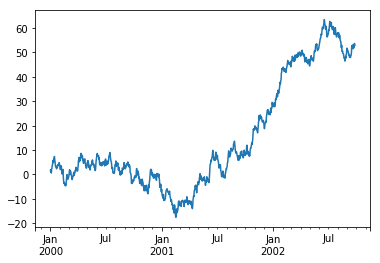

In [128]:
%matplotlib inline
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

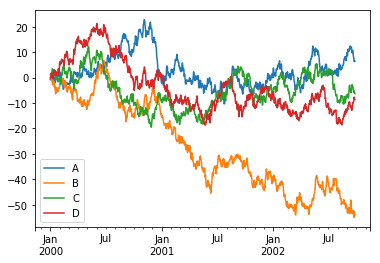

In [129]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')